In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/oguzmetekaya/Machine Learning/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop('Cabin', axis=1, inplace=True)

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

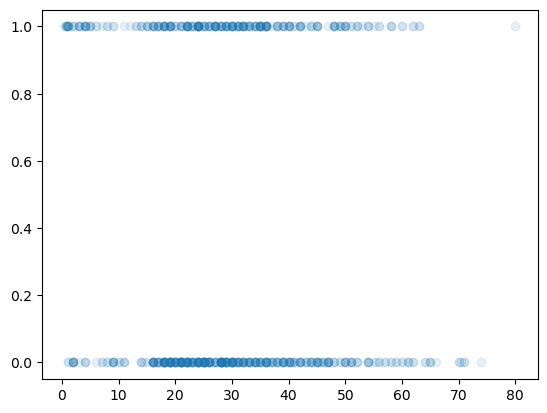

In [8]:
plt.scatter(x='Age', y='Survived', data = df, alpha=0.1);

In [9]:
df[(df['Age'] > 70) & (df['Survived'] ==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,S


# Hayatta Kalma Oranları

In [10]:
df[(df['Age'] < 20) & (df['Survived'] ==1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 9 to 887
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  79 non-null     int64  
 1   Survived     79 non-null     int64  
 2   Pclass       79 non-null     int64  
 3   Name         79 non-null     object 
 4   Sex          79 non-null     object 
 5   Age          79 non-null     float64
 6   SibSp        79 non-null     int64  
 7   Parch        79 non-null     int64  
 8   Ticket       79 non-null     object 
 9   Fare         79 non-null     float64
 10  Embarked     79 non-null     object 
dtypes: float64(2), int64(5), object(4)
memory usage: 7.4+ KB


In [11]:
len(df[(df['Age'] < 20) & (df['Survived'] ==1)])

79

In [12]:
len(df[(df['Age'] < 20) & (df['Survived'] ==0)])

85

In [13]:
len(df[df['Survived'] ==1])

342

In [14]:
age_na = df[df['Age'].isna()]
age_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [15]:
age_na.value_counts('Survived')


Survived
0    125
1     52
dtype: int64

In [16]:
print('Yaşı Belirsizler: %', (52/125)*100)

Yaşı Belirsizler: % 41.6


In [17]:
age_na.value_counts('Pclass')

Pclass
3    136
1     30
2     11
dtype: int64

In [18]:
df.value_counts('Pclass')

Pclass
3    491
1    216
2    184
dtype: int64

In [20]:
df[ df['Pclass'] == 3].mean()

/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_3226/1454984752.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[ df['Pclass'] == 3].mean()


PassengerId    439.154786
Survived         0.242363
Pclass           3.000000
Age             25.140620
SibSp            0.615071
Parch            0.393075
Fare            13.675550
dtype: float64

In [21]:
df = df.dropna()

In [23]:
print(len(df))

712


<Axes: xlabel='Age', ylabel='Pclass'>

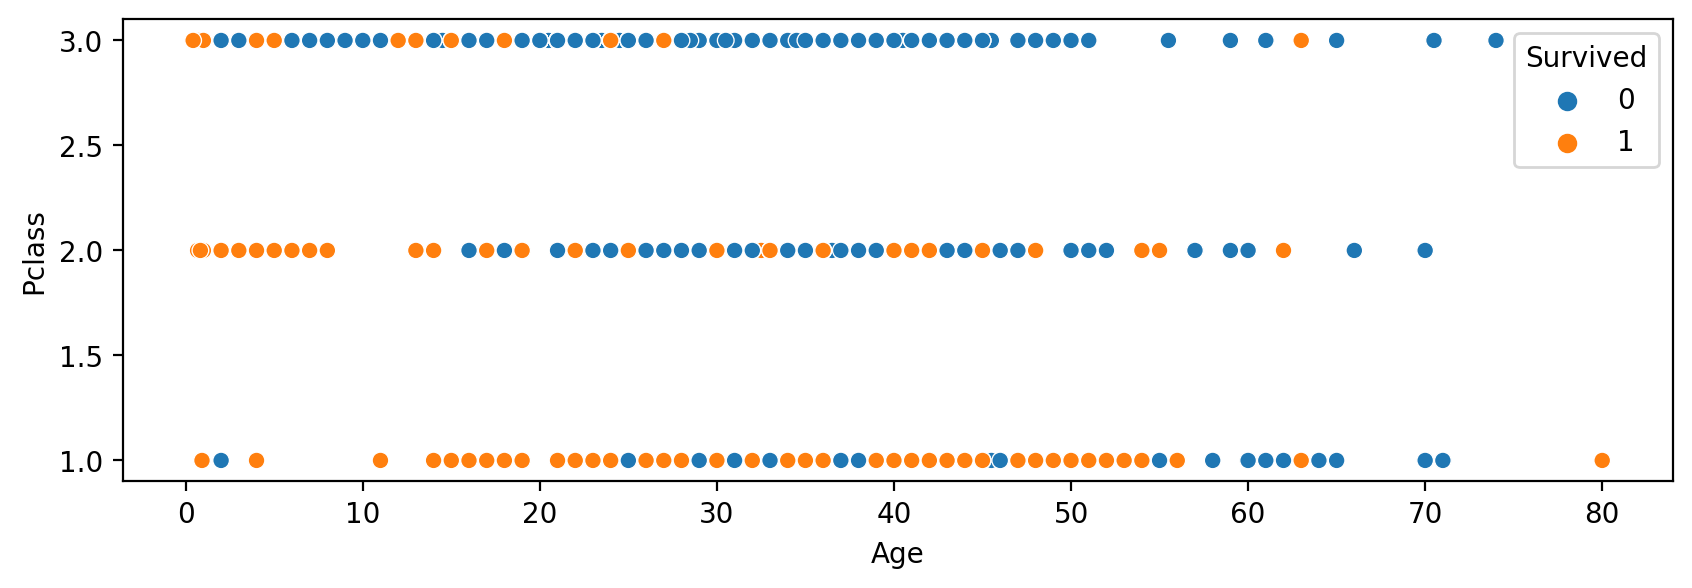

In [29]:
plt.figure(figsize=(10,3), dpi=200)
sns.scatterplot(x='Age', y='Pclass', data=df, hue='Survived')

In [30]:
df[['Pclass', 'Survived']].value_counts()

Pclass  Survived
3       0           270
1       1           120
2       0            90
3       1            85
2       1            83
1       0            64
dtype: int64

'How to print numbers on a sns count plot'

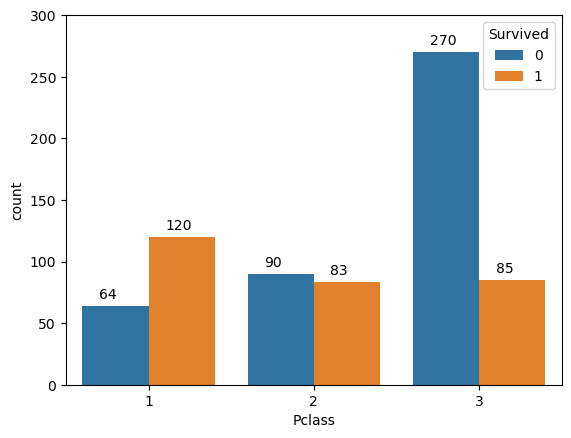

In [38]:
ax = sns.countplot(x='Pclass', data=df, hue='Survived')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+6))
    
plt.ylim(0,300) 

'How to print numbers on a sns count plot'
    

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [44]:
X = df.drop(['PassengerId','Name','Ticket','Survived'], axis=1)

In [45]:
X = pd.get_dummies(X, drop_first=True)

In [46]:
y = df['Survived']

In [47]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [49]:
y_train

278    0
177    0
438    0
452    0
93     0
      ..
90     0
211    1
231    0
49     0
805    0
Name: Survived, Length: 498, dtype: int64

In [50]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
278,3,7.0,4,1,29.1250,1,1,0
177,1,50.0,0,0,28.7125,0,0,0
438,1,64.0,1,4,263.0000,1,0,1
452,1,30.0,0,0,27.7500,1,0,0
93,3,26.0,1,2,20.5750,1,0,1
...,...,...,...,...,...,...,...,...
90,3,29.0,0,0,8.0500,1,0,1
211,2,35.0,0,0,21.0000,0,0,1
231,3,29.0,0,0,7.7750,1,0,1
49,3,18.0,1,0,17.8000,0,0,1


### SVM MODEL

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [52]:
model = SVC()

In [54]:
C = 10. ** np.arange(-2,4)

In [55]:
parameters = {
    'C': C,
    'kernel' : ['rbf', 'poly'],
    'degree' : [2,3,4]
}

In [56]:
C

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [57]:
grid = GridSearchCV(model, parameters, cv=9)
grid.fit(X_train, y_train)

GridSearchCV(cv=9, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': [2, 3, 4], 'kernel': ['rbf', 'poly']})

In [58]:
grid.best_params_

{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}

In [59]:
jack = grid.predict(X_test)

In [60]:
grid.best_score_

0.7890331890331891

In [62]:
from grid_plot import GridSearch_table_plot

best parameters: {'C': 1000.0, 'degree': 2, 'kernel': 'poly'}
best score:      0.78903 (+/-0.05111)
{'C': 1000.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
31,0.187765,0.120971,0.000759,0.000253,1000.0,2,poly,"{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}",0.785714,0.821429,0.821429,0.836364,0.854545,0.763636,0.763636,0.781818,0.672727,0.789033,0.051111,1
32,0.012905,0.002612,0.000673,0.000015,1000.0,3,rbf,"{'C': 1000.0, 'degree': 3, 'kernel': 'rbf'}",0.785714,0.803571,0.857143,0.836364,0.781818,0.727273,0.781818,0.800000,0.654545,0.780916,0.056405,2
30,0.012938,0.002601,0.000683,0.000022,1000.0,2,rbf,"{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}",0.785714,0.803571,0.857143,0.836364,0.781818,0.727273,0.781818,0.800000,0.654545,0.780916,0.056405,2
34,0.013015,0.002752,0.000689,0.000042,1000.0,4,rbf,"{'C': 1000.0, 'degree': 4, 'kernel': 'rbf'}",0.785714,0.803571,0.857143,0.836364,0.781818,0.727273,0.781818,0.800000,0.654545,0.780916,0.056405,2
28,0.003513,0.000205,0.000746,0.000018,100.0,4,rbf,"{'C': 100.0, 'degree': 4, 'kernel': 'rbf'}",0.767857,0.696429,0.785714,0.836364,0.727273,0.763636,0.763636,0.781818,0.709091,0.759091,0.040488,5
26,0.003497,0.000209,0.000739,0.000017,100.0,3,rbf,"{'C': 100.0, 'degree': 3, 'kernel': 'rbf'}",0.767857,0.696429,0.785714,0.836364,0.727273,0.763636,0.763636,0.781818,0.709091,0.759091,0.040488,5
24,0.003501,0.000209,0.000737,0.000016,100.0,2,rbf,"{'C': 100.0, 'degree': 2, 'kernel': 'rbf'}",0.767857,0.696429,0.785714,0.836364,0.727273,0.763636,0.763636,0.781818,0.709091,0.759091,0.040488,5
33,0.709496,0.570000,0.001052,0.000288,1000.0,3,poly,"{'C': 1000.0, 'degree': 3, 'kernel': 'poly'}",0.678571,0.714286,0.660714,0.727273,0.690909,0.727273,0.800000,0.709091,0.690909,0.711003,0.037790,8
22,0.002898,0.000079,0.000791,0.000028,10.0,4,rbf,"{'C': 10.0, 'degree': 4, 'kernel': 'rbf'}",0.767857,0.625000,0.767857,0.745455,0.727273,0.800000,0.690909,0.690909,0.581818,0.710786,0.067272,9
20,0.003032,0.000154,0.000832,0.000078,10.0,3,rbf,"{'C': 10.0, 'degree': 3, 'kernel': 'rbf'}",0.767857,0.625000,0.767857,0.745455,0.727273,0.800000,0.690909,0.690909,0.581818,0.710786,0.067272,9


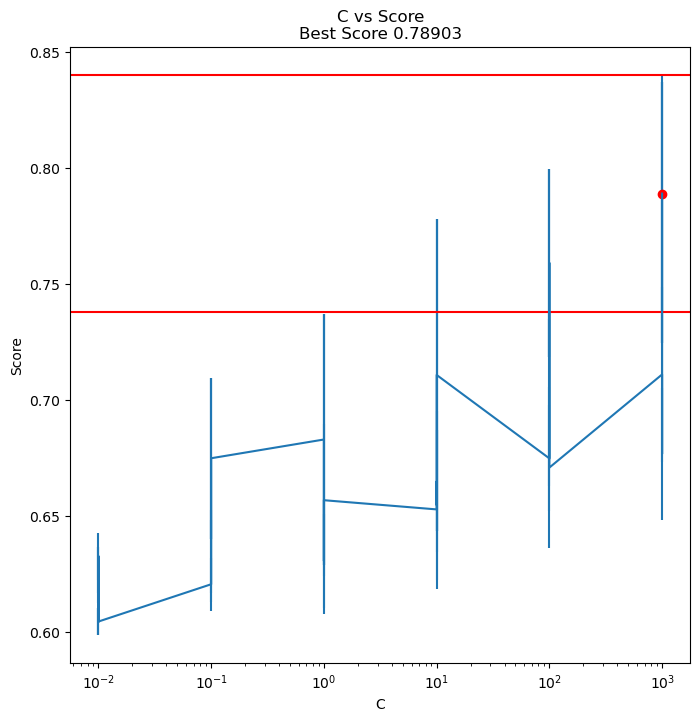

In [65]:
GridSearch_table_plot(grid, 'C', negative=False);

## Model Değerlendirme

In [66]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

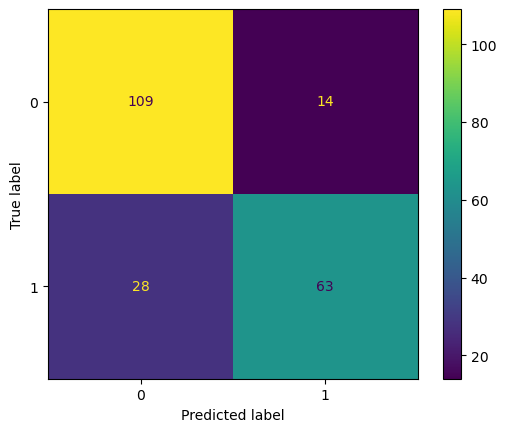

In [67]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [69]:
print(classification_report(y_test,jack))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       123
           1       0.82      0.69      0.75        91

    accuracy                           0.80       214
   macro avg       0.81      0.79      0.79       214
weighted avg       0.81      0.80      0.80       214

